# Leetcode刷题(20181022)

## [82-Remove Duplicates from Sorted List II](https://leetcode.com/problems/remove-duplicates-from-sorted-list-ii/description/)

问题难度: &clubs;&clubs;&clubs;

### 问题描述

给定一个排好序的链式列表, 删除所有有重复节点的数字, 只留下原始链表中的*唯一*字符.

**示例1**
```
Input: 1->2->3->3->4->4->5
Output: 1->2->5
```

**示例2**
```
Input: 1->1->1->2->3
Output: 2->3
```

### 解题思路

本质思想与之前删除数组中重复的数字类似, 只不过把存储格式从数组换成了链表. 在这里,我们使用了三个指针, 分别标识:
- 新链表当前元素, 用于移动元素, 如果某个数字不重复,则将该结点加入到新链表中,并将链表前移动;如果重复的话,暂时将链表的`next`指向下一个结点
- 原链表前元素, 判断元素是否重复,至少需要比较两个结点, 便于在数字不重复的情况下将其加入新链表
- 原链表后后元素, 用于判断元素是否与之前的节点数值相同

### 代码

In [1]:
# Definition for singly-linked list.
class ListNode(object):
    def __init__(self, x):
        self.val = x
        self.next = None


class Solution(object):
    def deleteDuplicates(self, head):
        """
        :type head: ListNode
        :rtype: ListNode
        """
        if head is None or head.next is None:
            return head
        ans = ListNode(0)
        tmp = ListNode(0)
        now, end = head, head.next
        now_num = now.val
        ans.next = tmp
        is_dup = False
        while end is not None:
            while end is not None and end.val == now_num:
                is_dup = True
                end = end.next
            if not is_dup:
                tmp.next = now
                tmp = tmp.next
            else:
                tmp.next = end
            if end is not None:
                now = end
                now_num = now.val
                is_dup = False
                end = end.next
        return ans.next.next

In [3]:
a = ListNode(1)
b = ListNode(2)
c = ListNode(3)
d = ListNode(3)
e = ListNode(3)
f = ListNode(4)

a.next = b
b.next = c
c.next = d
d.next = e
e.next = f

s = Solution()
res = s.deleteDuplicates(a)
while res is not None:
    print(res.val)
    res = res.next

1
2
4


## [83-Remove Duplicates from Sorted List](https://leetcode.com/problems/remove-duplicates-from-sorted-list/description/)

问题难度: &clubs;

### 问题描述

给定一个排好序的链表, 删除所有重复的元素以保证每个元素*只会出现一次*.

**示例1**
```
Input: 1->1->2
Output: 1->2
```

**示例2**
```
Input: 1->1->2->3->3
Output: 1->2->3
```

### 解题思路

应该是属于比较简单的题目, 使用两个指针, 分别指向当前节点和下一个疑似的节点, 如果两个节点的值相等, 那么当前节点不动, 疑似节点向前移动一步; 如果值不相等, 那么当前节点的`next`指向疑似节点, 两个指针都分别向前移动一步, 直到疑似节点指向末尾为止.

### 代码

In [11]:
# Definition for singly-linked list.
class ListNode(object):
     def __init__(self, x):
         self.val = x
         self.next = None

class Solution(object):
    def deleteDuplicates(self, head):
        """
        :type head: ListNode
        :rtype: ListNode
        """
        if head is None:
            return head
        ans = ListNode(0)
        ans.next = head
        tail = head.next
        while tail is not None and head is not None:
            if head.val == tail.val:
                tail = tail.next
            else:
                head.next = tail
                head = head.next
                tail = tail.next
        if head is not None:
            head.next = tail
        return ans.next

In [12]:
a = ListNode(1)
b = ListNode(2)
c = ListNode(2)
d = ListNode(2)
e = ListNode(2)
f = ListNode(4)

a.next = b
b.next = c
c.next = d
d.next = e
e.next = f

s = Solution()
ans = s.deleteDuplicates(f)
while ans is not None:
    print(ans.val)
    ans = ans.next

4


## [84-Largest Rectangle in Histogram](https://leetcode.com/problems/largest-rectangle-in-histogram/description/)

问题难度:&clubs;&clubs;&clubs;&clubs;&clubs;

### 问题描述

给定`n`个非负的整数表示直方图的块权重, 其中每一块的宽度均为`1`, 找到直方图中最大长方形的面积.

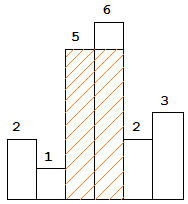
上面是一个直方图, 每一块的宽度均为`1`, 给定的高度为`[2,1,5,6,2,3]`

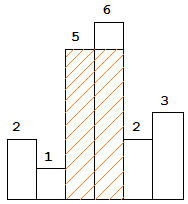
最大的长方形展示为阴影处, 其面积为`10`个单位

**示例**
```
Input: [2,1,5,6,2,3]
Output: 10
```

### 解题思路

**方法1**

从头开始遍历数组, 分别遍历两遍, `i`从`0`到`len(heights)`, `j`从`i`到`len(heights)`, `i`到`j`的长方形计算公式如下: `min(nums[i:j])*(j-i+1)`. 这样, 自然而然可以得到一个`o(n^2)`复杂度的算法. 但是, 很明显,这样肯定会超过时间复杂度, 无法`AC`.

**方法2**

网上看到一种借助栈的算法, 思路如下:
- 如果已知`heights`是升序, 例如`[1,2,3,4,5]`, 那么需要比较`1*5 Vs 2*4 Vs 3*3 Vs 4*2 Vs 5*1`, 归纳一下为: `heights[i] * (len(heights) - i)`
- 但是`heights`本身不一定是升序的, 因此需要考虑构造这样的升序序列(假设用栈存储). 以`[2,1,5,6,2,3]`为例, 具体的构造过程如下:
    - `2`进栈, `s={2}`, 此时`ans = 2`
    - `1`不满足升序, 将`2`弹出, 并记录当前结果`2*1=2`, 将`2`替换为`1`重新进栈, `s={1,1}`, `ans=2`
    - `5`满足升序, 直接进栈, `s={1,1,5}`, `ans=2`
    - `6`满足升序, 直接进栈, `s={1,1,5,6}`, `ans=2`
    - `2`不满足升序, 将`6`弹出, 并记录当前结果`6*1=6`,`s={1,1,5}`, `ans=6`, 仍然不满足升序条件, 将`5`弹出, 并记录当前结果`5*2=10`, `s={1,1}`, `ans=10`, 此时终于满足升序条件了, 将弹出的`5`,`6`全部替换为`2`重新进栈, `s={1,1,2,2,2}`, `ans=10`
    - `3`满足升序, 直接进栈, `s={1,1,2,2,2,3}`, `ans=10`
    构造完成, 只需要按照上一种条件遍历计算即可. 整体时间复杂度为`O(n)`.
    
### 代码

In [14]:
class Solution(object):
    # method 1: brute force
    def largestRectangleArea(self, heights):
        """
        :type heights: List[int]
        :rtype: int
        """
        max_area = 0
        if len(heights) == 0:
            return max_area
        for i in range(len(heights)):
            min_num = heights[i]
            for j in range(i, len(heights)):
                if heights[j] < min_num:
                    min_num = heights[j]
                area = (j-i + 1) * min_num
                if area > max_area:
                    max_area = area
        return max_area
    
    # method 2: stack method
    def largestRectangleAreaStack(self, heights):
        """
        :type heights: List[int]
        :rtype: int
        """
        if len(heights) == 0:
            return 0
        ans = 0
        s = [heights[0]]
        for i in range(1, len(heights)):
            num = heights[i]
            if num >= s[-1]:
                s.append(num)
            else:
                j = len(s) - 1
                tmp = list()
                while j >= 0:
                    if num >= s[j]:
                        break
                    now_ans = s[j] * (len(s) - j)
                    if now_ans > ans:
                        ans = now_ans
                    j -= 1
                j += 1
                while j < len(s):
                    s[j] = num
                    j += 1
                s.append(num)
        for i in range(len(s)):
            now_ans = s[i] * (len(s)-i)
            if now_ans > ans:
                ans = now_ans
        return ans

s = Solution()
heights = [4,2,0,3,2,5]
print (s.largestRectangleAreaStack(heights))

6


## [85-Maximal Rectangle](https://leetcode.com/problems/maximal-rectangle/description/)

问题难度:&clubs;&clubs;&clubs;&clubs;&clubs;

### 问题描述

给定一个使用`0`和`1`填充的二维二进制矩阵, 找到只包含`1`的最大矩阵, 并且返回这个矩阵的面积.

**示例**

```
Input:
[
  ["1","0","1","0","0"],
  ["1","0","1","1","1"],
  ["1","1","1","1","1"],
  ["1","0","0","1","0"]
]
Output: 6
```

### 解题思路

**暴力破解法**

对于这个二维矩阵, 从头开始遍历, 对于当前的索引`i`和`j`, 如果`matrix[i][j] == 1`, 那么:
找到从`i``j`开始的所有矩形:

- 向右遍历, 直到遇到`0`为止, 记录当前行中`1`的个数(记为`num`), 设置`min_col=num`
- 向下遍历, 直到遇到`0`为止, 记录每一行从第`i`列到第`min_col`列中`1`的个数, 更新`min_col`的值

**延伸拓展**

其中这一题还可以从每一层来看, 可以延伸拓展为上面提到的直方图计算最大的矩形面积的题目, 针对每一行, 都可以向上形成一个直方图, 再针对每个直方图调用上面`84`题的解决方案即可.


### 代码

In [13]:
class Solution(object):
    # brute force
    def maximalRectangle(self, matrix):
        """
        :type matrix: List[List[str]]
        :rtype: int
        """
        if len(matrix) == 0 or len(matrix[0]) == 0:
            return 0
        max_area = 0
        m, n = len(matrix), len(matrix[0])
        for i in range(len(matrix)):
            for j in range(len(matrix[i])):
                cur_num = matrix[i][j]
                if cur_num == "1":
                    area = self.getRecArea(matrix, i, j, m, n)
                    if area > max_area:
                        max_area = area
                    #print 'i: %d, j:%d, area: %d' %(i, j, area)
        return max_area
    
    def getRecArea(self, matrix, i, j, m, n):
        max_area = 0
        start_row, start_col = i+1, j
        min_col = 0
        area = 0
        while start_col < n and matrix[i][start_col] == "1":
            start_col += 1
            min_col += 1
            area += 1
        #print 'i: %d, j:%d, min_col:%d' %(i, j, min_col)
        if area > max_area:
            max_area = area
        while start_row < m and matrix[start_row][j] == "1":
            start_col = j
            num = 0
            while start_col < n and start_col < start_col + min_col and matrix[start_row][start_col] == "1":
                start_col += 1
                num += 1
            if num < min_col:
                min_col = num
            area = (start_row - i + 1) * min_col
            #print 'start_row: %d, min_col: %d, area: %d' %(start_row, min_col, area)

            if area > max_area:
                max_area = area
            start_row += 1
        return max_area
    
    # dynamic programming
    def maximalRectangleStack(self, matrix):
        """
        :type matrix: List[List[str]]
        :rtype: int
        """
        if len(matrix) == 0 or len(matrix[0]) == 0:
            return 0
        max_area = 0
        m, n = len(matrix), len(matrix[0])
        heights = [0] * (n+1)
        for i in range(m):
            # construct the histogram
            for j in range(n):
                if matrix[i][j] == '1':
                    heights[j] += 1
                else:
                    heights[j] = 0
            stack = [-1]
            for j in range(n+1):
                while heights[j] < heights[stack[-1]]:
                    height = heights[stack.pop()]
                    width = j - stack[-1] - 1
                    area = height * width
                    if area > max_area:
                        max_area = area
                stack.append(j)
        return max_area

In [14]:
matrix = [["1","0","1","0","0"],["1","0","1","1","1"],["1","1","1","1","1"],["1","0","0","1","0"]]
s = Solution()
ans = s.maximalRectangleStack(matrix)
print(ans)

6


## [86-Partition List](https://leetcode.com/problems/partition-list/description/)

问题难度: &clubs; &clubs; &clubs;

### 问题描述

给定一个链表和值`x`, 对其进行分区, 使得小于`x`的所有节点链接到左边,而大于或等于`x`的所有节点链接到右边.

我们应该保留两个分区中每个分区的节点中的原始相对顺序.

**示例**
```
Input: head = 1->4->3->2->5->2, x = 3
Output: 1->2->2->4->3->5
```

### 解题思路

维护两个指针分别指向小于`x`的值(`left`)和大于等于`x`的值(`right`), 遍历链表, 根据情况更新对应指针的`next`值.最后将`left`指针的`next`值指向`right`指针即可.

### 代码

In [15]:
# Definition for singly-linked list.
class ListNode(object):
    def __init__(self, x):
        self.val = x
        self.next = None

class Solution(object):
    def partition(self, head, x):
        """
        :type head: ListNode
        :type x: int
        :rtype: ListNode
        """
        left = ListNode(0)
        left_tmp = ListNode(0)
        left.next = left_tmp
        right = ListNode(0)
        right_tmp = ListNode(0)
        right.next = right_tmp
        while head is not None:
            while head is not None and head.val < x:
                left_tmp.next = head
                left_tmp = left_tmp.next
                head = head.next
            left_tmp.next = None
            while head is not None and head.val >= x:
                right_tmp.next = head
                right_tmp = right_tmp.next
                head = head.next
            right_tmp.next = None
        left_tmp.next = right.next.next
        return left.next.next

In [16]:
a = ListNode(1)
b = ListNode(1)
c = ListNode(4)
d = ListNode(2)
e = ListNode(2)
f = ListNode(3)
g = ListNode(5)
a.next = b
b.next = c
c.next = d
d.next = e
e.next = f
f.next = g

s = Solution()
res =  s.partition(a, 3)
while res is not None:
    print(res.val)
    res = res.next

1
1
2
2
4
3
5


## [87-Scramble String](https://leetcode.com/problems/scramble-string/description/)

问题难度: &clubs;&clubs;&clubs;&clubs;&clubs;

### 问题描述

给定一个字符串`s1`, 我们可以通过递归地将字符串分割为两个非空的子字符串来表示为一个二进制树.

下面是`s1=great`的一个可能表示:
```
    great
   /    \
  gr    eat
 / \    /  \
g   r  e   at
           / \
          a   t
```

为了打散这个字符串, 我们可以选择任一非叶子节点然后交换它的两个孩子节点. 这样就会构成打乱的字符串`rgeat`:
```
    rgeat
   /    \
  rg    eat
 / \    /  \
r   g  e   at
           / \
          a   t
```
同样地, 如果我们继续交换节点`eat`和`at`的孩子节点, 将会生成一个打乱的字符串: `rgtea`"
```
   rgtae
   /    \
  rg    tae
 / \    /  \
r   g  ta  e
       / \
      t   a
```
我们说`rgtea`是`great`的打乱字符串.

给定两个长度相同的zifuc`s1`和`s1`, 判断`s2`是否是`s1`的打乱字符串.

**示例1**
```
Input: s1 = "great", s2 = "rgeat"
Output: true
```

**示例2**
```
Input: s1 = "abcde", s2 = "caebd"
Output: false
```

### 解题思路

## [88-Merge Sorted Array](https://leetcode.com/problems/merge-sorted-array/description/)

问题难度: &clubs;

### 问题描述

给定两个排好序的整数数组`nums1` 和 `nums2`, 将`nums2` 与 `nums1` 合并成一个排好序的数组.

**注意**:

- `nums1` 和 `nums2` 中的原始元素数目分别为 `m` 和 `n`
-  我们可以假设 `nums1` 有足够的空间 (数组长度大于或等于 `m + n`) 来容纳来自 `nums2` 的元素

**示例**
```
Input:
nums1 = [1,2,3,0,0,0], m = 3
nums2 = [2,5,6],     n = 3

Output: [1,2,2,3,5,6]
```

### 解题思路

核心思想为插入排序, 使用三个指针,`num_insert`指向`nums1`数组中待插入的地址, `start`指向`nums2`数组中需要插入的起始元素位置, `end`指向`nums_2`数组中需要插入的末尾元素位置

那么如何更新三个值呢?

- 初始化: `num_insert = 0, start = 0, end = 0`
- 更新: 
    - 如果`num1[num_insert]<=num2[end]`并且`num_insert<m`, `num_insert += 1`, 直到`num1[num_insert] > num2[end]`为止
    - `end += 1`, 直到`num1[num_insert] < num2[end]`或者`end>n`为止, 将`nums2[start: end]`插入到`nums1[num_insert + start - end - 1 ,num_insert-1]`, 将`num1[num_insert:]`向后移, `start=end, m+= end-start`
    
### 代码

In [1]:
class Solution(object):
    def merge(self, nums1, m, nums2, n):
        """
        :type nums1: List[int]
        :type m: int
        :type nums2: List[int]
        :type n: int
        :rtype: void Do not return anything, modify nums1 in-place instead.
        """
        num_insert, start, end = 0, 0, 0
        pivot = nums1[num_insert]
        num1_len = len(nums1)
        while num_insert < m and end < n:
            while num_insert < m and nums1[num_insert] <= nums2[end]:
                pivot = nums1[num_insert]
                num_insert += 1
            if num_insert < m:
                pivot = nums1[num_insert]
            while end < n and nums2[end] <= pivot:
                end += 1
            move_len = end - start
            nums1[num_insert + move_len:] = nums1[num_insert:num1_len - move_len]
            nums1[num_insert: num_insert + move_len] = nums2[start: end]
            start = end
            m += move_len
            num_insert += move_len
        if end < n and num_insert >= m:
            nums1[num_insert:n+1-start+num_insert] = nums2[start:n+1]

In [2]:
nums1 = [1,2,4,5,6,0]
m = 5
nums2 = [3]
n = 1
s = Solution()
s.merge(nums1, m, nums2, n)
print(nums1)

[1, 2, 3, 4, 5, 6]
